In [4]:
import urllib.request
import json
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np

class Naver_trend_API():
    """
    네이버 데이터랩 오픈 API
    """

    def __init__(self, client_id, client_secret):
        """
        인증키 및 키워드 그룹 초기화
        """
        self.client_id = client_id
        self.client_secret = client_secret
        self.keywordGroups = []
        self.url = "https://openapi.naver.com/v1/datalab/search"
        
    def add_keyword_groups(self, group_dict):
        """
        검색어 그룹 추가
        """

        keyword_gorup = {
            'groupName': group_dict['groupName'],
            'keywords': group_dict['keywords']
        }
        
        self.keywordGroups.append(keyword_gorup)


    def get_data(self, startDate, endDate, timeUnit, device, ages, gender):
        """
        요청 결과 반환
        timeUnit - 'date', 'week', 'month'
        device - None, 'pc', 'mo'
        ages = [], ['1' ~ '11']
        gender = None, 'm', 'f'
        """

        # Request body
        body = json.dumps({
            "startDate": startDate,
            "endDate": endDate,
            "timeUnit": timeUnit,
            "keywordGroups": self.keywordGroups,
            "device": device,
            "ages": ages,
            "gender": gender
        }, ensure_ascii=False)
        
        # Results
        request = urllib.request.Request(self.url)
        request.add_header("X-Naver-Client-Id",self.client_id)
        request.add_header("X-Naver-Client-Secret",self.client_secret)
        request.add_header("Content-Type","application/json")
        response = urllib.request.urlopen(request, data=body.encode("utf-8"))
        rescode = response.getcode()
        if(rescode==200):
            # Json Result
            result = json.loads(response.read())
            
       

            df1 = pd.DataFrame(result['results'][0]['data'])
            df1=df1.rename(columns={'ratio': result['results'][0]['title']})
            df2 = pd.DataFrame(result['results'][1]['data'])
            df2=df2.rename(columns={'ratio': result['results'][1]['title']})
            df3 = pd.DataFrame(result['results'][2]['data'])
            df3=df3.rename(columns={'ratio': result['results'][2]['title']})
            
            
            df = pd.merge(df1, df2,how='left', on=['period'])
            df = pd.merge(df, df3,how='left', on=['period'])
                      
        else:
            print("Error Code:" + rescode)
        self.df = df    
        return self.df

    
keyword_group_set = {
    'keyword_group_1': {'groupName': "고려사이버대", 'keywords': ["고려사이버대","고려사이버대학교","고려사이버"]},
    'keyword_group_2': {'groupName': "한양사이버대", 'keywords': ["한양사이버대","한양사이버대학교","한양사이버"]},
    'keyword_group_3': {'groupName': "경희사이버대", 'keywords': ["경희사이버대","경희사이버대학교","경희사이버"]},

}


# API 인증 정보 설정
client_id = "DtxV5cxd43iCXUIOwv4h"
client_secret = "ErBqsqeU1V"

# 요청 파라미터 설정
startDate = "2022-01-01"
endDate = "2022-12-31"
timeUnit = 'month'
device = ''
ages = []
gender = ''

# 데이터 프레임 정의
naver = Naver_trend_API(client_id=client_id, client_secret=client_secret)

naver.add_keyword_groups(keyword_group_set['keyword_group_1'])
naver.add_keyword_groups(keyword_group_set['keyword_group_2'])
naver.add_keyword_groups(keyword_group_set['keyword_group_3'])

df = naver.get_data(startDate, endDate, timeUnit, device, ages, gender)

print(tabulate(df, headers ='keys',tablefmt ='psql'))


+----+------------+----------------+----------------+----------------+
|    | period     |   고려사이버대 |   한양사이버대 |   경희사이버대 |
|----+------------+----------------+----------------+----------------|
|  0 | 2022-01-01 |        67.7054 |       100      |        74.4252 |
|  1 | 2022-02-01 |        60.1895 |        83.5482 |        61.9388 |
|  2 | 2022-03-01 |        56.5084 |        54.8365 |        64.7914 |
|  3 | 2022-04-01 |        52.8273 |        51.8463 |        58.4483 |
|  4 | 2022-05-01 |        42.2761 |        43.0861 |        50.9312 |
|  5 | 2022-06-01 |        50.2888 |        62.9393 |        58.9578 |
|  6 | 2022-07-01 |        34.446  |        44.4506 |        44.0324 |
|  7 | 2022-08-01 |        38.818  |        44.4714 |        49.6696 |
|  8 | 2022-09-01 |        38.1594 |        37.0006 |        54.201  |
|  9 | 2022-10-01 |        47.3657 |        45.5355 |        60.2288 |
| 10 | 2022-11-01 |        43.1369 |        47.755  |        60.1236 |
| 11 | 2022-12-01 |     

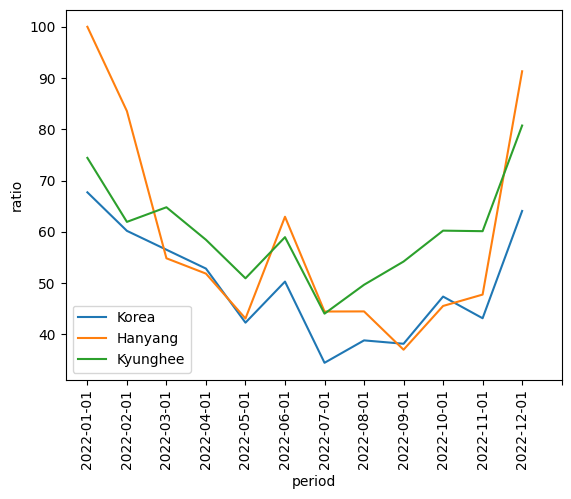

In [5]:
plt.plot(df['period'],df['고려사이버대'])
plt.plot(df['period'],df['한양사이버대'])
plt.plot(df['period'],df['경희사이버대'])
plt.legend(('Korea','Hanyang','Kyunghee'))
plt.xlabel('period')
plt.ylabel('ratio')
plt.xticks(np.arange(0, 13, 1),rotation=90)

plt.show()